# Gathering Data 

In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read twitter achive file into a dataframe 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
# Download the image-predictions.tsv file programmatically and load it into a dataframe 
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
# image prediction file into dataframe
image_pred = pd.read_csv('image-predictions.tsv',sep="\t")

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) 

In [4]:
tweet_list = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        tweet_id = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        tweet_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})      

In [5]:
retweet_favourite_count = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Assessing Data - Visual and Programmatic Assessment 

### Enhanced Twitter Archive

In [6]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1984,672902681409806336,NaN,NaN,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He's stuck in a pot. Damn it ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672902681...,9,10,Jimison,None,None,None,None
1544,689517482558820352,NaN,NaN,2016-01-19 18:39:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He just wants to make sure you'r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689517482...,12,10,Carl,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
1547,689280876073582592,NaN,NaN,2016-01-19 02:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689280876...,10,10,Herald,None,None,None,None
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,None,None,None,None
1992,672614745925664768,NaN,NaN,2015-12-04 03:13:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Norman. Doesn't bark much. Very docile...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672614745...,6,10,Norman,None,None,pupper,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive.source.duplicated().sum()

2352

In [9]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
twitter_archive.rating_denominator.sample(15)

998     10
1594    10
2253    10
287     10
1547    10
1774    10
2333    10
2344    10
151     10
202     10
2201    10
555     10
680     10
792     10
1071    10
Name: rating_denominator, dtype: int64

In [12]:
twitter_archive.rating_numerator.sample(15)

1611    10
545     12
398     12
1083    11
1217    12
365     13
1710     8
134     12
1934    11
2290    10
2305     3
2045    10
1425    10
1071    10
1564    10
Name: rating_numerator, dtype: int64

#### Observations from twitter_archive 

- There are 2356 rows and 17 columns 
- A quick visual assessment shows that have each column for the dog stage is not necessary - it is better to have one column for all the dog stages. There are also missing information for the dog stages
-  There are Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp and expanded_urls.They also will not be useful for any analysis
- There 2352 duplicate values in the source column
- There are many missing names from the name column:'None', and random names like'a', 'an'
- rating_denominator and rating_numerator: should be floats not integers since it is possible for dog ratings to have a number with a decimal either in the denominator or numerator. 
- The max values for both rating_numerator and rating_denominator are huge: 1776, 170. The minimum is 0 for both
- timestamp field should be a datetime not object, +0000 at the end of timestamp redundant.


### Image Predictions File

In [13]:
image_pred.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False
1139,729463711119904772,https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg,1,German_shepherd,0.829307,True,Doberman,0.022500,True,basenji,0.021190,True
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074819,True
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden_retriever,0.532460,True,crossword_puzzle,0.103796,False,binder,0.100371,False
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
1200,740995100998766593,https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg,1,malamute,0.454363,True,Samoyed,0.215967,True,Siberian_husky,0.077500,True
486,675497103322386432,https://pbs.twimg.com/media/CV_ZAhcUkAUeKtZ.jpg,1,vizsla,0.519589,True,miniature_pinscher,0.064771,True,Rhodesian_ridgeback,0.061491,True
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True


In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_pred.duplicated().sum()

0

In [16]:
image_pred.p1.sample(10)

1262    German_short-haired_pointer
367                       Chihuahua
1684               golden_retriever
1028                       malamute
117                          Angora
282                        Shih-Tzu
502                golden_retriever
91                       Pomeranian
417                      Pomeranian
938                    window_shade
Name: p1, dtype: object

#### Observations from image_pred

- There are 2075 rows and 12 columns 
- tweet_id column should be an object (string) not int

### Retweet and Favourite Count File 

In [17]:
retweet_favourite_count.sample(15)

,tweet_id,retweet_count,favorite_count
2241,667902449697558528,396,905
2239,667915453470232577,59,222
1650,683481228088049664,1118,2878
106,871762521631449091,3678,20787
903,758099635764359168,11550,21302
1501,692017291282812928,1081,3153
938,753026973505581056,1109,4283
172,858471635011153920,5271,22640
1421,697995514407682048,372,1665
528,808344865868283904,24069,47281


In [18]:
retweet_favourite_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [19]:
retweet_favourite_count.shape

(2354, 3)

In [20]:
retweet_favourite_count.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


#### Observations from retweet_favourite_count
- There are 2354 rows and 3 columns.
- All variables are in the correct data type.
- No negative or unusual values in retweets and favourites.

### Summary of Visual and Programmatic assessments

#### Quality
1. 0000 at the end of timestamp is not necessary.
2. Incorrect data type issues - tweet_id should be object not integers or floats because they are not numeric and aren't intended to perform calculations,  rating_denominator and rating_numerator should be floats not integers since there is nothing stopping future dog ratings from having a number with a decimal either in the denominator or numerator, tweet_id column in image prediction should be an object (string) not integers or floats because they are not numeric and will not be used for performing calculations, timestamp field should be a datetime not object.
3. Too many Missing values in columns in_reply_to_status_id, in_reply_to_user_id.
4. Redundant retweet rows. Remove values in the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns 
5. Some rating_numerators were extracted incorrectly
6. Too many duplicate values in column: source
7. Many missing names from the 'name' column:'None', and random names like'a', 'an'
8. jpg_url column is making the dataset not look neat - unnecessary for analysis 

#### Tidyness
1. Each column for the dog stage in the twitter archive should be merged into one column as 'dog_stage'
2. Data does not need to be split over three datasets - the other two datasets should be joined to 'twitter_archive'

# Cleaning Data

> Create copies of all 3 datasets before carrying out any cleaning operations 

In [21]:
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
retweet_favourite_count_clean = retweet_favourite_count.copy()

> Now, I will address the quality issues listed above one after the other

  ## Data Quality Issues 

1. **+0000 at the end of timestamp is not necessary**

> Remove +0000 from the timestamp

##### Code

In [22]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-5].str.strip()

##### Test

In [23]:
twitter_archive_clean.timestamp.sample(4)

1161    2016-04-23 16:34:28
110     2017-06-03 20:33:19
1930    2015-12-08 01:30:12
2279    2015-11-19 18:13:27
Name: timestamp, dtype: object

2. **Incorrect data type issues -** 
 - tweet_id should be object not integers or floats because they are not numeric and aren't intended to perform calculations.
 - rating_denominator and rating_numerator should be floats not integers since there is nothing stopping future dog ratings from having a number with a decimal either in the denominator or numerator.
 - tweet_id column in image prediction should be an object (string) not integers or floats because they are not numeric and will not be used for performing calculations.
 - timestamp field should be a datetime not object.

> The above mentioned columns wil be changed to the appropraite data formats 

##### Code

In [24]:
# Change tweet_id in twitter archive to str 

twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

In [25]:
# Change rating_denominator and rating_numerator to floats 

twitter_archive_clean[['rating_denominator', 'rating_numerator']] = twitter_archive_clean[['rating_denominator', 'rating_numerator']].astype(float)

In [26]:
# Change timestamp to datetime format 

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [27]:
# change tweet_id in image prediction to str 

image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype('str')

##### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   float64     

In [29]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


3. **Redundant in_reply_to_status_id, in_reply_to_user_id and expanded_urls columns.**

> I will drop these two columns because they are not needed for any analysis 

##### Code

In [30]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis =1, inplace=True)

In [31]:
# Reset index after deleting columns

twitter_archive_clean.reset_index(drop = True, inplace = True)

##### Test

In [32]:
twitter_archive_clean

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,5.0,10.0,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,6.0,10.0,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,9.0,10.0,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,7.0,10.0,a,None,None,None,None


4.  **Redundant retweet rows. Remove values in the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.**

> Remove all values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp and drop the columns afterwards. 

##### Code

In [33]:
# Delete all the retweets in the columns 

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

##### Test

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   timestamp                   2175 non-null   datetime64[ns]
 2   source                      2175 non-null   object        
 3   text                        2175 non-null   object        
 4   retweeted_status_id         0 non-null      float64       
 5   retweeted_status_user_id    0 non-null      float64       
 6   retweeted_status_timestamp  0 non-null      object        
 7   rating_numerator            2175 non-null   float64       
 8   rating_denominator          2175 non-null   float64       
 9   name                        2175 non-null   object        
 10  doggo                       2175 non-null   object        
 11  floofer                     2175 non-null   object      

 > These columns can now be deleted after removing all the retweets

##### Code

In [35]:
 twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis =1, inplace=True)

In [36]:
# Reset index after deleting columns

twitter_archive_clean.reset_index(drop = True, inplace = True)

##### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   float64       
 5   rating_denominator  2175 non-null   float64       
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 187.0+ KB


5. **Some rating_numerators were incorrectly extracted. The whole numbers were not correctly extracted.**

> I will extract those ratings correctly 

#### Code 

In [38]:
# Use regex to extract the rating numerators again.

twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

In [39]:
# Change rating numerator back to float 

twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

##### Test

In [40]:
# Check affected columns to see if change has been effected 

twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\TRANSSNET\AppData\Local\Temp\ipykernel_30348\1526494966.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
42,This is Bella. She hopes her smile made you sm...,13.50
558,"This is Logan, the Chow who lived. He solemnly...",9.75
617,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1510,I've been told there's a slight possibility he...,9.50
1533,Here we have uncovered an entire battalion of ...,11.26


In [41]:
print('Ratings have been extracted correctly')

Ratings have been extracted correctly


6. **Too many duplicate values in column: source**
 
> Source column will be dropped because we don't need it for analysis 

#### Code 

In [42]:
twitter_archive_clean.drop(columns='source', inplace=True)

#### Test

In [43]:
if 'source' not in twitter_archive_clean.columns:
    print("Source column has been deleted")
else:
    print("Source column present")

Source column has been deleted


7. **Many missing names from the 'name' column:'None', and random names like 'a'**

> remove any names with small letters as they are most likely not correct

##### Code

In [44]:
# list all of names that are not capitalized. 
lower_dog_name_index = twitter_archive_clean[twitter_archive_clean.name.str.islower()].index

> This list contains non-capitalized words from the name column, none of which are valid names.

In [45]:
# Drop the rows 
twitter_archive_clean.drop(lower_dog_name_index, inplace=True)

##### Test

In [46]:
twitter_archive_clean.name.str.islower()

0       False
1       False
2       False
3       False
4       False
        ...  
2161    False
2162    False
2163    False
2170    False
2174    False
Name: name, Length: 2071, dtype: bool

8. **jpg_url column is making the dataset not look neat - unnecessary for analysis**
 
> This column will be dropped 

##### Code

In [47]:
image_pred_clean.drop(columns='jpg_url', axis=1, inplace=True)

##### Test

In [48]:
if 'jpg_url' not in twitter_archive_clean.columns:
    print("jpg_url column has been deleted")
else:
    print("jpg_url column present")

jpg_url column has been deleted


## Data Tidiness Issues

1. **Each column for the dog stage in the twitter archive should be merged into one column as 'dog_stage'**

> One important data tidiness issue about the dog stages columns. It is best to make the columns into a single column. There are some tweets that contain more than one dog stage so that will be considered as well.

##### Code

In [49]:
# 'None' values 
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [50]:
# merge
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [51]:
# Multiple Stages 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [52]:
# Missing values 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [53]:
# Drop the doggo, floofer, pupper and puppo columns 
twitter_archive_clean.drop(["doggo","floofer", "pupper", "puppo"], axis=1, inplace=True)

##### Test

In [54]:
twitter_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN
...,...,...,...,...,...,...,...
2161,666082916733198337,2015-11-16 02:38:37,Here we have a well-established sunblockerspan...,6.0,10.0,None,NaN
2162,666073100786774016,2015-11-16 01:59:36,Let's hope this flight isn't Malaysian (lol). ...,10.0,10.0,None,NaN
2163,666071193221509120,2015-11-16 01:52:02,Here we have a northern speckled Rhododendron....,9.0,10.0,None,NaN
2170,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,NaN


2. **Data does not need to be split over three datasets - the other two datasets should be joined to 'twitter_archive'**

> The datasets will now be combined to form a master dataset.


#### Code

In [55]:
# Merge twitter archive and retweet_favourite files 

twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=retweet_favourite_count_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [56]:
# Merge the previosly merged file with image_pred

twitter_archive_clean = twitter_archive_clean.merge(image_pred_clean, on='tweet_id', how='inner')

##### Test

In [57]:
twitter_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,8853,39467,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,6514,33819,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,4328,25461,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,8964,42908,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,9774,41048,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,666082916733198337,2015-11-16 02:38:37,Here we have a well-established sunblockerspan...,6.0,10.0,None,NaN,47,121,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1892,666073100786774016,2015-11-16 01:59:36,Let's hope this flight isn't Malaysian (lol). ...,10.0,10.0,None,NaN,174,335,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
1893,666071193221509120,2015-11-16 01:52:02,Here we have a northern speckled Rhododendron....,9.0,10.0,None,NaN,67,154,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1894,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,NaN,41,111,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Storing Data

> The cleaned and merged dataset will now be saved 

In [58]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data


In [59]:
master_archive = pd.read_csv('twitter_archive_master.csv')

> For the analysis sections, I will use to data to answer some questions that I can use to gain more insight into the data.The following are the research questions I will be answering:

1. Which dog stage is the most popular based on retweets and favourite count ?
2. Whats is the correlation between Retweet count and Favourite count ?
3. What are the top 5 most predicted dog stages ?

 1. **Which dog stage is the most popular based on number of tweets ?**

In [60]:
master_archive.dog_stage.value_counts()

pupper            194
doggo              61
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

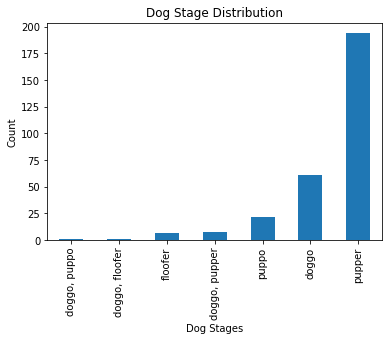

In [61]:
# Dog stage distributiom
master_archive.dog_stage.value_counts().sort_values().plot(kind = 'bar')
plt.xlabel("Dog Stages")
plt.ylabel('Count')
plt.title("Dog Stage Distribution")
plt.show()

- Most of the tweets did not have dog stages 
- puppers have the most tweets followed by doggos

2. **Which are stage is the most popular based on retweets and favourite count ?**

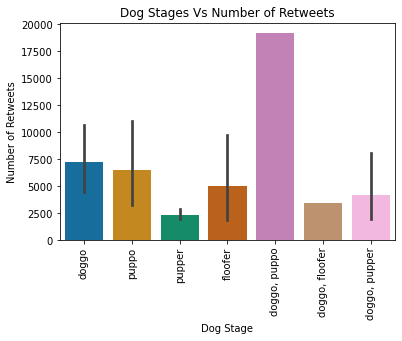

In [62]:
# Plot dog stage based on number of retweets 
g = sns.barplot(x = master_archive.dog_stage, y = master_archive.retweet_count,  palette = "colorblind")
plt.xticks(rotation=90)
g.set(xlabel = 'Dog Stage', ylabel='Number of Retweets')
plt.title('Dog Stages Vs Number of Retweets')
plt.show()

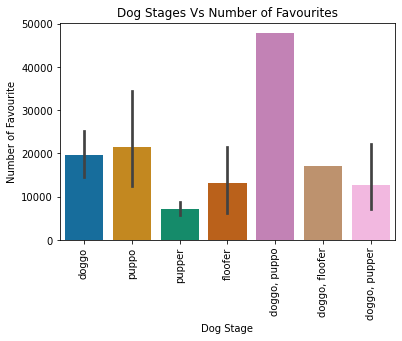

In [63]:
# Plot dog stage based on number of favourites 
g = sns.barplot(x = master_archive.dog_stage, y = master_archive.favorite_count,  palette = "colorblind")
plt.xticks(rotation=90)
g.set(xlabel = 'Dog Stage', ylabel='Number of Favourite')
plt.title('Dog Stages Vs Number of Favourites')
plt.show()

- Of the tweets with dog stages, ''doggo,puppo' had the most retweets and favourite counts despite having just one tweet with the doggo,puppo stage. 

3. **Whats is the correlation between Retweet count and Favourite count ?**

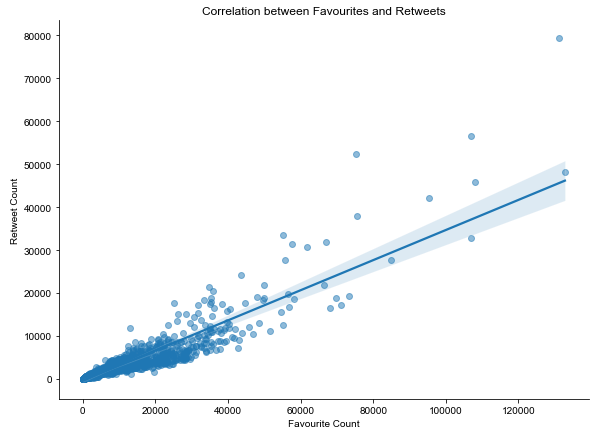

In [64]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="favorite_count", 
           y="retweet_count", 
           data=master_archive,
           height = 6,
           aspect=1.4,
           scatter_kws={'alpha':0.5})
plt.title('Correlation between Favourites and Retweets')
plt.xlabel('Favourite Count')
plt.ylabel('Retweet Count')
sns.set_style('darkgrid');

In [65]:
np.corrcoef(master_archive.retweet_count, master_archive.favorite_count)[1, 0]

0.911309597334546

> Correlation coefficient = 0.911. There is a very strong correlation between retweets and favourite counts. 

4. **What are the top 5 most predicted dog stages ?**

In [66]:
# Isolate dog breeds in descending order to see those in the top 5 
dog_breed = master_archive.p1.value_counts().sort_values(ascending = False)

In [67]:
dog_breed

golden_retriever      135
Labrador_retriever     92
Pembroke               84
Chihuahua              77
pug                    51
                     ... 
toilet_seat             1
water_bottle            1
leaf_beetle             1
sandbar                 1
desktop_computer        1
Name: p1, Length: 362, dtype: int64

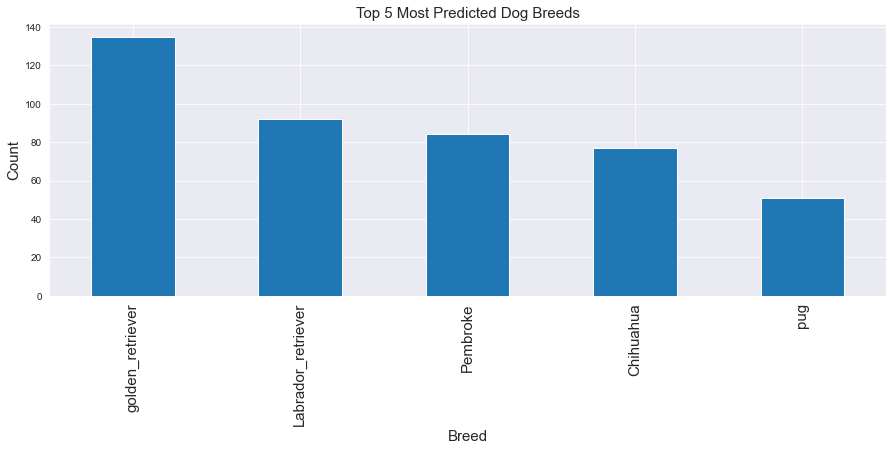

In [68]:
# Plot a bar chart of the top 5 most common dog breeds. 
dog_breed[:5].plot(kind = 'bar', figsize=(15,5)) 
plt.title("Top 5 Most Predicted Dog Breeds", fontsize= 15)
plt.xticks(rotation=90, fontsize= 15)
plt.xlabel("Breed",fontsize= 15)
plt.ylabel("Count",fontsize= 15)
sns.set_style('darkgrid')

- The two most predicted dog types are Golden Retrievers and Labrator Retrievers. These two are usually the some of the most common dog breeds. 
- Other dog breeds in the top 5 include Pembrokes, Chihuahuas and Pugs. 

## Conclusion

- The dog stage *'pupper'* is the most popular based on number of tweets sent out.
- *'doggo,puppo'* stage had the most retweets and favourite counts despite having just one tweet with that dog stage.
- Analysis showed that there is a strong linear correlation between retweet count and favourite count. The regression coefficient is 0.787. This is what is expected because users usually favourite tweets that they retweet. 
- Golden retriever, Labrador Retriever, Pembroke, Chihuahua and Pugs are the top 5 most common dog breeds predicted in the dataset. 


## Areas of Further Research
- The rating columns for can be analysed for more insight
- Only the 1st prediction column was used, all 3 columns may be used to determine the overall probability or popularity of dog breeds and how accurate predictions are in each tweet. 